In [9]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import metrics 
from pandas import DataFrame


iris= sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
pd.isnull(iris).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

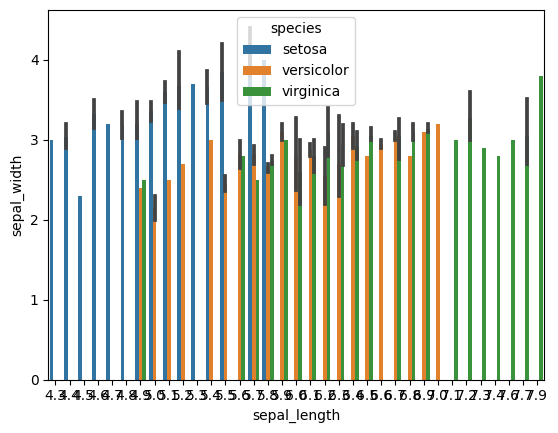

In [5]:
sns.barplot(x="sepal_length", y="sepal_width", data=iris, hue='species')

In [14]:
iris[:10]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [15]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [20]:
iris_frame = pd.DataFrame(iris)

In [21]:
iris_frame.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [26]:
iris_frame['species_num'] = 6

In [27]:
iris_frame.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,6
1,4.9,3.0,1.4,0.2,setosa,6
2,4.7,3.2,1.3,0.2,setosa,6
3,4.6,3.1,1.5,0.2,setosa,6
4,5.0,3.6,1.4,0.2,setosa,6
5,5.4,3.9,1.7,0.4,setosa,6
6,4.6,3.4,1.4,0.3,setosa,6
7,5.0,3.4,1.5,0.2,setosa,6
8,4.4,2.9,1.4,0.2,setosa,6
9,4.9,3.1,1.5,0.1,setosa,6


In [33]:
species_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
iris_frame['species_num'] = iris_frame['species'].map(species_mapping)

In [34]:
iris_frame.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


In [38]:
iris_frame.drop(columns="species")

,sepal_length,sepal_width,petal_length,petal_width,species_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
iris_frame.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_num
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species_num,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

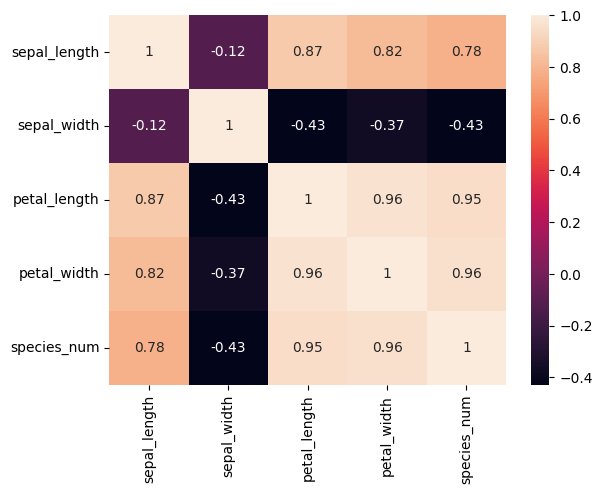

In [42]:
sns.heatmap(iris_frame.corr(), annot=True)

In [49]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


In [53]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal_length','sepal_width','petal_length','petal_width']], iris_frame['species_num'], test_size = 0.3, random_state = 0)

In [54]:
print(train_data)

     sepal_length  sepal_width  petal_length  petal_width
60            5.0          2.0           3.5          1.0
116           6.5          3.0           5.5          1.8
144           6.7          3.3           5.7          2.5
119           6.0          2.2           5.0          1.5
108           6.7          2.5           5.8          1.8
..            ...          ...           ...          ...
9             4.9          3.1           1.5          0.1
103           6.3          2.9           5.6          1.8
67            5.8          2.7           4.1          1.0
117           7.7          3.8           6.7          2.2
47            4.6          3.2           1.4          0.2

[105 rows x 4 columns]


In [55]:
test_data

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [56]:
train_labels

60     1
116    2
144    2
119    2
108    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: species_num, Length: 105, dtype: int64

In [69]:
model = linear_model.SGDClassifier(alpha=0.001, random_state = 52)
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)
metrics.accuracy_score(test_labels, model_predictions)

0.7111111111111111

In [70]:
print(metrics.classification_report(test_labels, model_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.28      0.43        18
           2       0.46      1.00      0.63        11

    accuracy                           0.71        45
   macro avg       0.82      0.76      0.69        45
weighted avg       0.87      0.71      0.68        45

